In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


SPAM DETECTION USING PYTHON

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.shape

(5572, 5)

# **# 1 -> Data Ceaning**

In [ ]:
# df.info() -> for checking entries in coumns
# drop last 3 columns because no usefu data
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
749,ham,By monday next week. Give me the full gist
5247,ham,Gud ni8 dear..slp well..take care..swt dreams....
1057,ham,Ard 515 like dat. Y?
2900,spam,Ur cash-balance is currently 500 pounds - to m...
3918,ham,I wish! I don't think its gonna snow that much...


In [ ]:
# rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
# we have to give numberic values to spam and no spam
from sklearn.preprocessing import LabelEncoder as LE

encoder = LE()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)
#df.head()

,target,text
1196,0,What he said is not the matter. My mind saying...
4165,0,Well if I'm that desperate I'll just call arma...
90,0,Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
4593,0,I had a good time too. Its nice to do somethin...
5421,0,"Hi elaine, is today's meeting confirmed?"


In [ ]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check duplicate values

df.duplicated().sum()

403

In [ ]:
# remove duplicate

df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

# **#2 -> EDA**
In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

In [ ]:
# check how much spam and how much ham

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

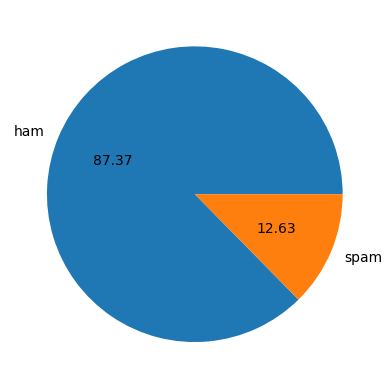

In [ ]:
# represent in chart

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

# we can see data is imbalance


In [ ]:
# descriminate the data into no of characters , no of words , no of sentences in the sms by using nltk

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len) # returns length of every messege and makes new col num characters


In [ ]:
# fetch no of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# fetch no of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
# used to describe our data
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# check ham texts

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# check spam texts

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

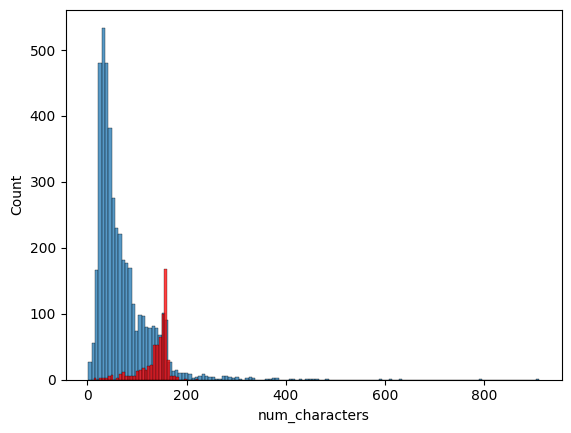

In [ ]:
# plot histogram for spam and ham

import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_characters']) #extract ham texts
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #extract spam texts

<Axes: xlabel='num_words', ylabel='Count'>

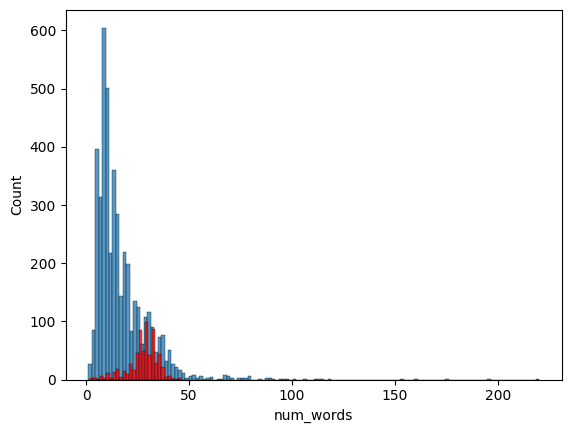

In [ ]:
# plot histogram for spam and ham

import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_words']) #extract spam words
sns.histplot(df[df['target'] == 1]['num_words'],color='red') #extract spam words

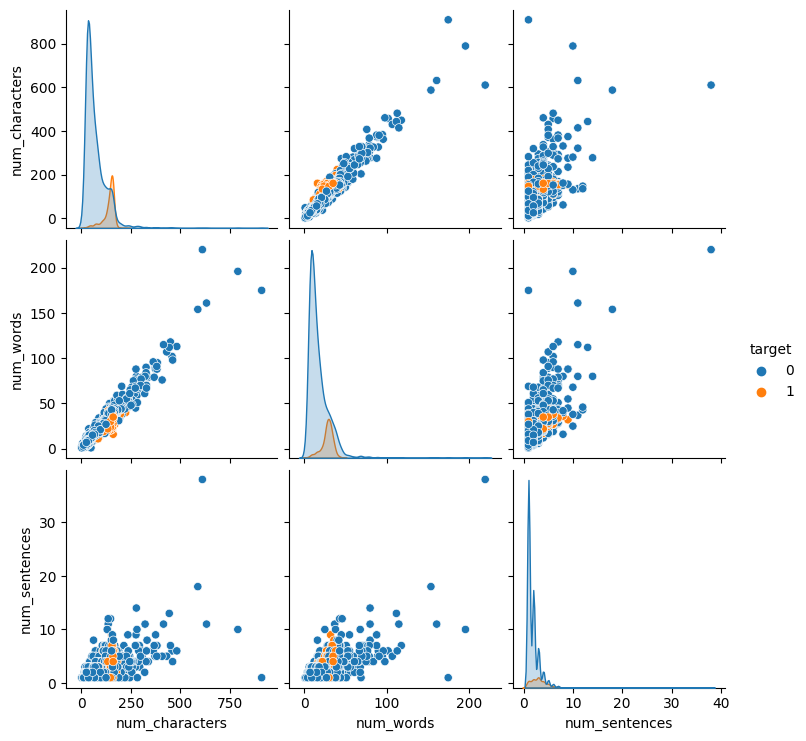

In [ ]:
# see relationship of columns

sns.pairplot(df,hue='target')

<ipython-input-26-8c6880a614e3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

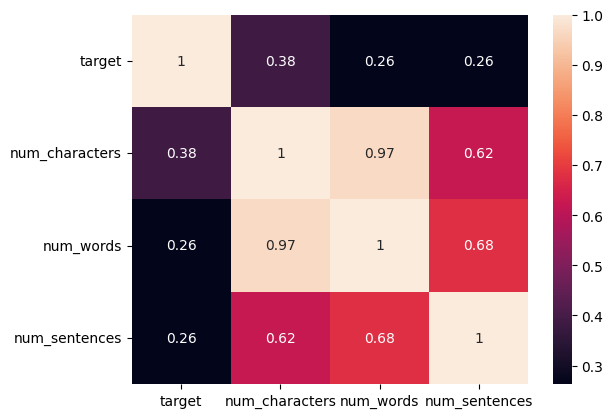

In [ ]:
# check co-relations
# -> df.corr()

# using heatmap

sns.heatmap(df.corr(),annot=True)

# **3 -> Data Preprocessing**

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

*   Lower case
*   Tokenization

*   Remove special char
*   Remove stop words and puntuation


*   Stemming







In [ ]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
import string
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() # brings words to root form

stopwords.words('english')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)



In [ ]:
# add new coln
df['transformed_txt'] = df['text'].apply(transform_text)

df.head()



,target,text,num_characters,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


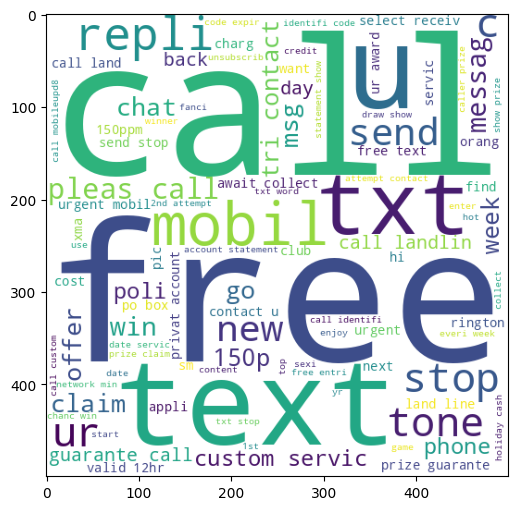

In [ ]:
# create wordcloud of spam texts

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# create wordcloud of ham texts


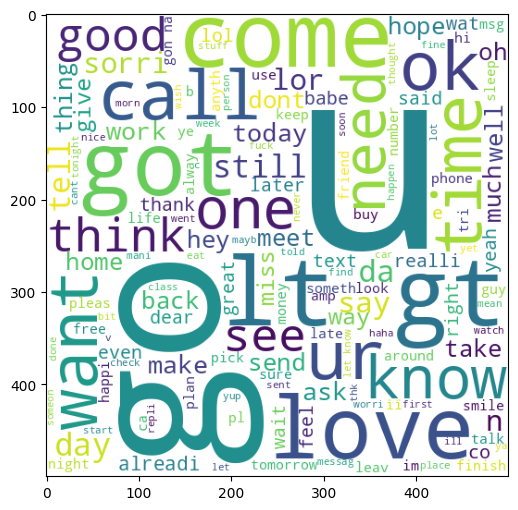

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_txt'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
# find out to 30-50 words of ham and spam

#df[df['target'] == 1]['transformed_txt'].tolist() #extract spam and convert to ist

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
#Counter(spam_corpus) # will create dictionary and count how many times a word has came
# find most common 30

#Counter(spam_corpus).most_common(30) #add thiz in dataframe

#pd.DataFrame(Counter(spam_corpus).most_common(30))

#plot in bar
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [ ]:
# find out to 30-50 words of ham now

#df[df['target'] == 0]['transformed_txt'].tolist() #extract spam and convert to ist

ham_corpus =[]

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
#pd.DataFrame(Counter(ham_corpus).most_common(30))
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2              

# **4 -> Model Building**

In [ ]:
# using Naive Bayes Algo

# step 1 -> convert the input data into numbers , we already have target in n umbers but the transformed text is in str so we'l convert it into vector / vactorise
# vactorise -> bag of words

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfid = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()
#df['transformed_txt'] = str(df['transformed_txt'])
#x = cv.fit_transform(df['transformed_txt']).toarray()
x = tfid.fit_transform(df['transformed_txt']).toarray()
y = df['target'].values



In [ ]:
# scaling
'''
from sklearn.preprocessing import MinMaxScaler #minmax becaause it dosn't give negative values and naive dont accept -ve
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
'''

"\nfrom sklearn.preprocessing import MinMaxScaler #minmax becaause it dosn't give negative values and naive dont accept -ve \nscaler = MinMaxScaler()\nx = scaler.fit_transform(x)\n"

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2) # test size is % of data for training

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb , mnb , bnb = GaussianNB() , MultinomialNB() , BernoulliNB()

# use gnb algo

gnb.fit(x_train,y_train)
ypred1 = gnb.predict(x_test)

print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

#it perform very bad



0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
# using mnb
# on imbalance data , precision matters

mnb.fit(x_train,y_train)
ypred2 = mnb.predict(x_test)

print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# using bnb

bnb.fit(x_train,y_train)
ypred3 = bnb.predict(x_test)

print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# we choose bnb with tfidf
# we'll compare precision and accuracy with all ML algos

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# assign the algos

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

# make a dictionary with key vals

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
# created a funx that will return accuracy and precision of a particular algo and
# in input it'll take algo, x train , y train , x test ,  y test

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
# example

train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [ ]:
# this code will return a table with all algos accuracy nd precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [ ]:
# check accuracy and precision

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


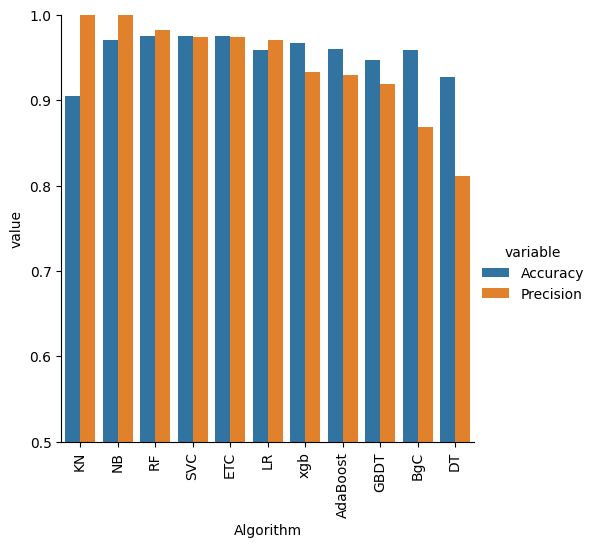

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf
# data representation based on  diff max features

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [ ]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# **Implementation**

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run app.py